### Sentimental Analysis of Product Review - Machine Learning Project

##### Developed by: Oluwasegun M. Adebayo (Data Analyst/Scientist)

##### Scenario: 
Daks was just employed by Flipkart as Data Scientist and there were just bunch of data to be refined. Flipkart continuously obtain review on their products and recently they became curious about how the data could be used for the betterment of the company. The manager approached Daks as to what could be done to the data. One of the suggestions of Daks was to develop a model that could be used to classify reviews as "positive", "negative" or "neutral".

What you will learn from this project:

1. how to load sample of a Big Data into memory
2. how to count categorical variables and how to use them to visualize data
3. how to make wordcloud from text data
4. how to split data into training and test set
5.  how to vectorize text data
6. how to train Multinomial Naive Bayes classifier and RandomForest classifier
7. how to interpret model results such as the "accuracy_score" and "classification_report" and
8. how to select models for production.

Data source: https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset

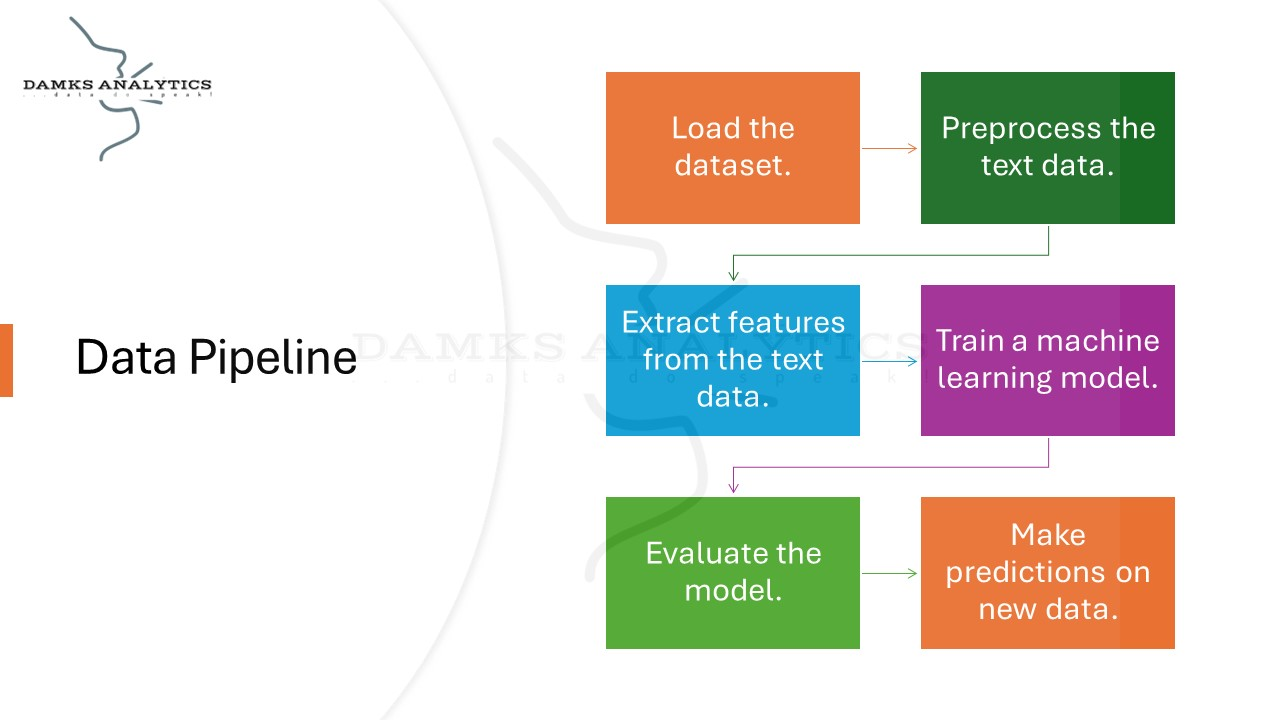

#### Importing modules

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

#### Loading the data

In [4]:
# Load a sample of the data (10%)
data = pd.read_csv('Dataset-SA.csv').sample(frac=0.1, random_state=42)

In [5]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


#### Visualize the sentiment distribution
- The next step now is to count the frequency of each category of sentiments in the data.
- this will return both the index of each category and the values
- so we can use the two to make a bar plot

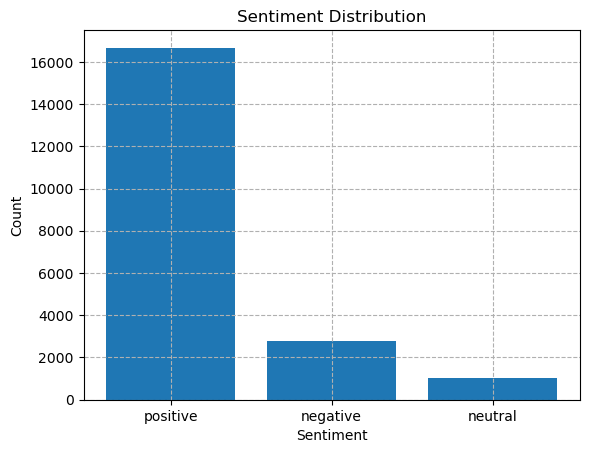

In [7]:
# Visualize the distribution of sentiments
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

#### Visualize the customers review summary using WordCloud
- we have to create a text variable which is  basically the text data to be visualized
- then we have to set the parameters of the wordcloud
- the matplotlib imshow function is then called to visualize the texts

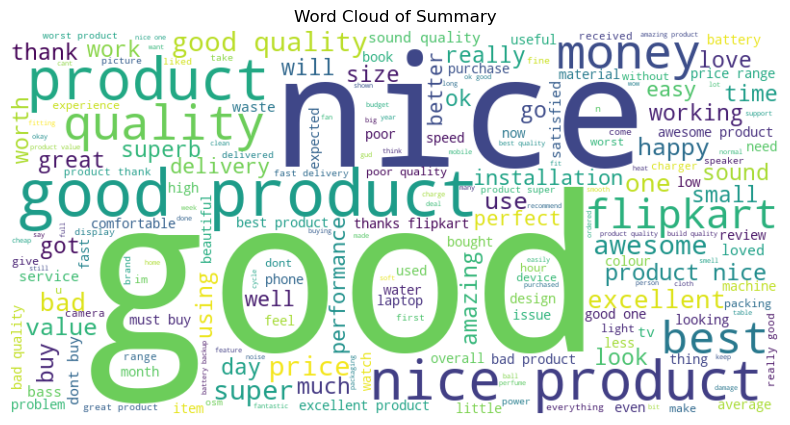

In [11]:
# Generate a word cloud for the 'Summary' column
text = ' '.join(data['Summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary')
plt.show()

#### Features extraction and split the data (train and test set)
- the next step is to select the features for our model such as the predictor(s) and target variable
- in this case, "summary" column is the predictor and "Sentiment" column is the target variable
- then we proceed to split the data into both the training and testing sets (80:20)

In [12]:
# Extract features from the text data
data = data.dropna()
X = data['Summary']
y = data['Sentiment']

# Train a machine learning model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Vectorization of the text data
- we now have to convert the data into the format that the algorithms understand
- this is called vectorization
- both the train and test sets have to be vectorized
- this is a crucial step in machine learning models that use text data

In [13]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#### Training - Multinomial Naive Bayes classifier
- after we get our data ready for training then we proceed to initiating the model
- then supply the training data to the model for it to learn

In [14]:
# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

#### Make predictions and check the accuracy of the model

In [15]:
# Make predictions using Multinomial Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.896398891966759
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



#### Training - RandomForest

In [16]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.9274238227146815
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



#### Prediction on New Data
- to make prediction on new data, let's write short function for each model
- the functions take the customer reviews as text then
- vectorize the input
- then pass it to the already-trained model to return the class of the sentiment

In [19]:
# Make predictions on new data
# Naives Bayes
def predict_sentiment_mt(text):
    text_counts = vectorizer.transform([text])
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction

# RandomForest
def predict_sentiment_rf(text):
    text_counts = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction

#### Case study

In [25]:
input_text = "really good bad product"
predicted_sentiment = predict_sentiment_mt(input_text)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: positive


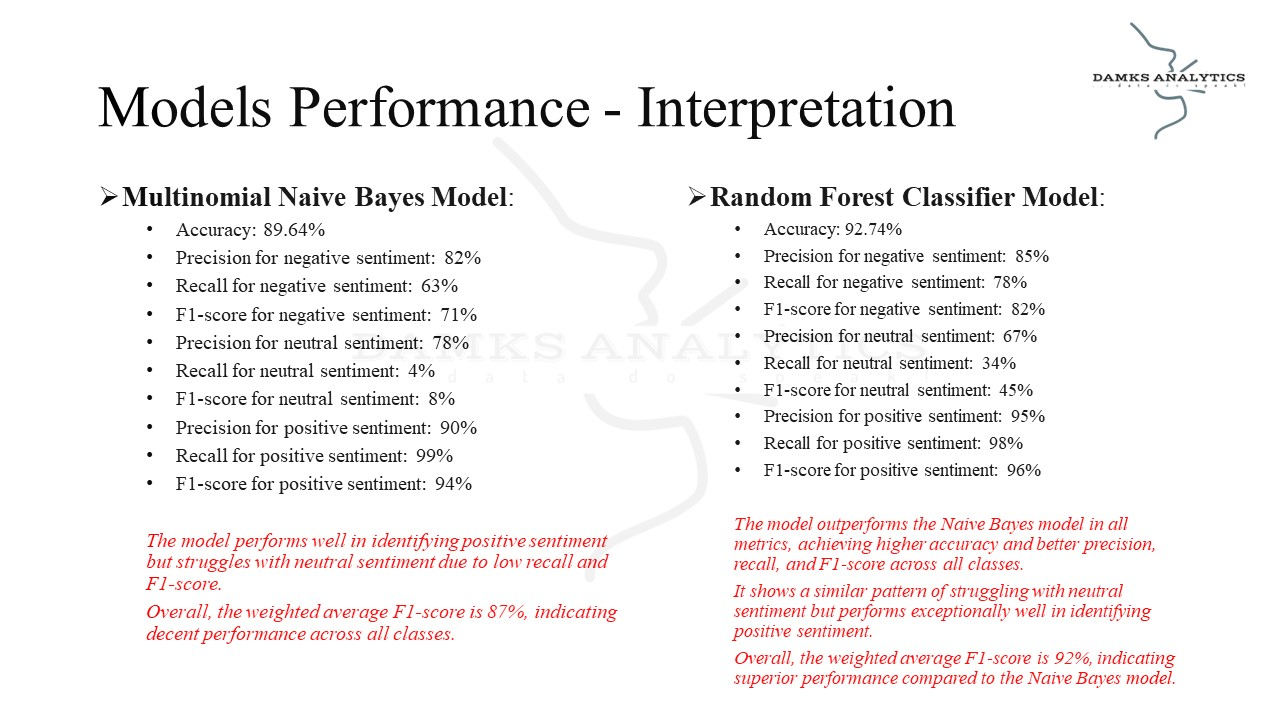